### 1번 문제

1. num_1 폴더의 파일을 데이터프레임으로 불러온다.
2. 데이터프레임의 오류를 확인하고 오류를 수정한다. (item_price의 결측치는 해당 item_name의 item_price의 최대값으로 변경해준다.)
3. 2개의 데이터프레임을 고객의 이름으로 조인 결합한다. 
4. 3번 과정의 결합한 데이터월 '년월' 컬럼을 추가한다. 
5. '년월' 컬럼을 기준으로 pivot_table을 이용하여 'item_name','itme_price'별 'item_price', '고객이름', '지역' 순으로 데이터를 집계한다. 

In [2]:
import pandas as pd
uriage_data = pd.read_csv("./num_1/uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [6]:
kokyaku_data = pd.read_excel("./num_1/kokyaku_daicho.xlsx", engine="openpyxl")
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [4]:
uriage_data["item_name"].head()

0      상품A
1    상 품 S
2    상 품 a
3      상품Z
4      상품a
Name: item_name, dtype: object

In [5]:
uriage_data["item_price"].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

In [6]:
kokyaku_data["등록일"].head()

0    2018-01-04 00:00:00
1                  42782
2    2018-01-07 00:00:00
3                  42872
4                  43127
Name: 등록일, dtype: object

In [7]:
uriage_data["item_name"] = uriage_data["item_name"].str.upper()
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ", "")
uriage_data.sort_values(by=["item_name"], ascending=True)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1748,2019-05-19 20:22,상품A,100.0,김시훈
223,2019-06-25 8:13,상품A,100.0,김유진
1742,2019-06-13 16:03,상품A,100.0,김건희
1738,2019-02-10 0:28,상품A,100.0,김하랑
...,...,...,...,...
2880,2019-04-22 0:36,상품Y,NaN,김동욱
2881,2019-04-30 14:21,상품Y,NaN,김하준
1525,2019-01-24 10:27,상품Y,2500.0,김범준
1361,2019-05-28 13:45,상품Y,2500.0,김수현


In [8]:
print(pd.unique(uriage_data["item_name"]))
print(len(pd.unique(uriage_data["item_name"])))

['상품A' '상품S' '상품Z' '상품V' '상품O' '상품U' '상품L' '상품C' '상품I' '상품R' '상품X' '상품G'
 '상품P' '상품Q' '상품Y' '상품N' '상품W' '상품E' '상품K' '상품B' '상품F' '상품D' '상품M' '상품H'
 '상품T' '상품J']
26


In [9]:
uriage_data.isnull().any(axis=0)

purchase_date    False
item_name        False
item_price        True
customer_name    False
dtype: bool

In [10]:
flg_is_null = uriage_data["item_price"].isnull()
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
    price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == trg), "item_price"].max()
    uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"]==trg)] = price
uriage_data.head()

C:\Users\moons\AppData\Local\Temp\ipykernel_21688\2913267938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"]==trg)] = price


,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상품S,1900.0,김우찬
2,2019-05-11 19:42,상품A,100.0,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품A,100.0,김강현


In [11]:
uriage_data.isnull().any(axis=0)

purchase_date    False
item_name        False
item_price       False
customer_name    False
dtype: bool

In [12]:
kokyaku_data["고객이름"].head()

0    김 현성
1    김 도윤
2    김 지한
3    김 하윤
4    김 시온
Name: 고객이름, dtype: object

In [13]:
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace(" ", "")
kokyaku_data["고객이름"].head()

0    김현성
1    김도윤
2    김지한
3    김하윤
4    김시온
Name: 고객이름, dtype: object

In [14]:
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

22

In [15]:
kokyaku_data["등록일"]

0      2018-01-04 00:00:00
1                    42782
2      2018-01-07 00:00:00
3                    42872
4                    43127
              ...         
195    2017-06-20 00:00:00
196    2018-06-20 00:00:00
197    2017-04-29 00:00:00
198    2019-04-19 00:00:00
199    2019-04-23 00:00:00
Name: 등록일, Length: 200, dtype: object

In [16]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "등록일"].astype("float"), unit="D") + pd.to_datetime("1900/01/01")
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [17]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "등록일"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 178, dtype: datetime64[ns]

In [18]:
kokyaku_data["등록일"] = pd.concat([fromSerial, fromString])
kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [19]:
kokyaku_data["등록연월"] = kokyaku_data["등록일"].dt.strftime("%Y%m")
rslt = kokyaku_data.groupby("등록연월").count()["고객이름"]
print(rslt)
print(len(kokyaku_data))

등록연월
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 고객이름, dtype: int64
200


In [20]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

,purchase_date,item_name,item_price,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02,상품A,100.0,김가온,C시,2017-01-26,201701
1,2019-07-13 13:05,상품S,1900.0,김우찬,C시,2018-04-07,201804
2,2019-05-11 19:42,상품A,100.0,김유찬,A시,2018-06-19,201806
3,2019-02-12 23:40,상품Z,2600.0,김재현,D시,2018-07-22,201807
4,2019-04-22 3:09,상품A,100.0,김강현,D시,2017-06-07,201706
...,...,...,...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민,B시,2017-07-01,201707
2995,2019-06-22 4:03,상품M,1300.0,김재원,E시,2018-03-31,201803
2996,2019-03-29 11:14,상품Q,1700.0,김지율,B시,2017-03-15,201703
2997,2019-07-14 12:56,상품H,800.0,김승주,E시,2018-07-15,201807


In [22]:
byItem = join_data.pivot_table(index="등록연월", columns="item_name", aggfunc="size", fill_value=0)
byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
등록연월,,,,,,,,,,,,,,,,,,,,,
201701,13,8,17,10,6,9,9,12,9,11,...,11,8,3,11,12,11,11,6,10,0
201702,7,6,7,5,4,7,3,12,7,7,...,7,9,9,5,2,9,8,10,10,0
201703,10,3,12,14,8,15,9,7,14,10,...,7,9,7,9,4,11,11,8,4,0
201704,10,9,9,11,4,10,12,9,9,5,...,17,9,17,8,5,4,12,7,9,0
201705,10,6,15,12,3,8,4,7,8,9,...,9,9,6,4,8,11,8,7,5,0
201706,12,5,10,7,7,6,7,4,8,10,...,6,10,9,11,11,10,6,5,3,0
201707,10,9,9,10,13,12,5,8,9,6,...,13,14,14,7,11,8,8,16,12,0
201801,7,4,5,4,14,12,14,7,6,13,...,6,13,7,5,6,8,3,3,5,0
201802,12,15,11,10,11,8,10,3,6,9,...,6,16,7,14,13,8,6,11,9,0


In [23]:
byPrice = join_data.pivot_table(index="등록연월", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
등록연월,,,,,,,,,,,,,,,,,,,,,
201701,1300,1600,5100,4000,3000,5400,6300,9600,8100,11000,...,18700,14400,5700,22000,25200,24200,25300,14400,25000,0
201702,700,1200,2100,2000,2000,4200,2100,9600,6300,7000,...,11900,16200,17100,10000,4200,19800,18400,24000,25000,0
201703,1000,600,3600,5600,4000,9000,6300,5600,12600,10000,...,11900,16200,13300,18000,8400,24200,25300,19200,10000,0
201704,1000,1800,2700,4400,2000,6000,8400,7200,8100,5000,...,28900,16200,32300,16000,10500,8800,27600,16800,22500,0
201705,1000,1200,4500,4800,1500,4800,2800,5600,7200,9000,...,15300,16200,11400,8000,16800,24200,18400,16800,12500,0
201706,1200,1000,3000,2800,3500,3600,4900,3200,7200,10000,...,10200,18000,17100,22000,23100,22000,13800,12000,7500,0
201707,1000,1800,2700,4000,6500,7200,3500,6400,8100,6000,...,22100,25200,26600,14000,23100,17600,18400,38400,30000,0
201801,700,800,1500,1600,7000,7200,9800,5600,5400,13000,...,10200,23400,13300,10000,12600,17600,6900,7200,12500,0
201802,1200,3000,3300,4000,5500,4800,7000,2400,5400,9000,...,10200,28800,13300,28000,27300,17600,13800,26400,22500,0


In [24]:
byCustomer = join_data.pivot_table(index="등록연월", columns="고객이름", aggfunc="size", fill_value=0)
byCustomer

고객이름,김가온,김강민,김강현,김건우,김건희,김경민,김규민,김규현,김다온,김대현,...,김현수,김현승,김현우,김현준,김현진,김호준,정도형,정영훈,정우석,정준기
등록연월,,,,,,,,,,,,,,,,,,,,,
201701,17,0,0,0,0,0,23,0,0,24,...,0,0,0,0,0,0,0,0,0,0
201702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
201703,0,0,0,0,0,0,0,16,0,0,...,0,0,0,0,0,0,0,0,0,0
201704,0,0,0,0,0,0,0,0,0,0,...,17,0,0,0,0,0,17,0,0,0
201705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
201706,0,4,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201707,0,0,0,0,0,17,0,0,0,0,...,0,0,0,13,10,0,0,0,0,0
201801,0,0,0,0,16,0,0,0,0,0,...,0,18,0,0,0,0,0,0,0,0
201802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
byRegion = join_data.pivot_table(index="등록연월", columns="지역", aggfunc="size", fill_value=0)
byRegion

지역,A시,B시,C시,D시,E시,F시,G시,H시
등록연월,,,,,,,,
201701,14,34,54,0,35,43,20,54
201702,0,35,17,0,52,13,46,0
201703,48,19,27,29,0,84,15,0
201704,46,17,31,41,35,45,16,0
201705,34,23,25,0,21,62,14,14
201706,27,11,31,35,16,14,50,19
201707,17,50,0,36,46,18,29,49
201801,43,28,11,31,50,0,12,20
201802,53,23,56,19,15,0,39,44


### 2번 문제

1. num_2폴더의 'market-price.csv' 파일을 데이터프레임으로 불러온다. 
2. 불러온 데이터프레임의 'day'컬럼의 데이터 값을 datetime으로 변경하고 인덱스로 설정한다. 
3. 데이터프레임을 시각화한다. 
4. (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습한다. 
5. 학습한 모델이 학습 데이터에 대해서 예측한 결과만을 시각화한다. 
6. 예측 결과의 마지막 5일과 실제 5일후의 데이터의 비교하여본다. (실제 5일의 데이터는 num_2폴더의 'market-price-test.csv'에 있다.)
7. 예측 결과의 RMSE를 구한다.
8. prophet을 이용하여 ARIMA모델과 같이 5일후의 데이터를 예측해본다. (

    ```
    prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
    ```
    
    prophet의 기본설정은 다음과 같이 한다. 
)
9. 예측 결과의 RMSE를 구한다. 
10. 예측 결과의 더 나은 결과를 내는 방법을 생각해본다. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [36]:
file_path = './num_2/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [37]:
# 기본 정보를 출력합니다.
print(bitcoin_df.shape)
print(bitcoin_df.info())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [38]:
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [39]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다. 
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터프레임의 index로 설정합니다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


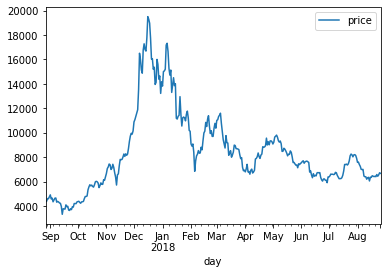

In [40]:
# 일자별 비트코인 시세를 시각화합니다.
bitcoin_df.plot()
plt.show()

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2), trend=(0,1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.473
Date:                Fri, 06 May 2022   AIC                           5586.945
Time:                        20:32:34   BIC                           5610.328
Sample:                             0   HQIC                          5596.239
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.1901     35.515      0.174      0.862     -63.418      75.798
ar.L1          0.2404      0.337      0.712      0.476      -0.421       0.902
ar.L2          0.6060      0.210      2.887      0.0

<AxesSubplot:>

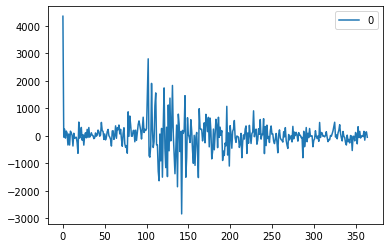

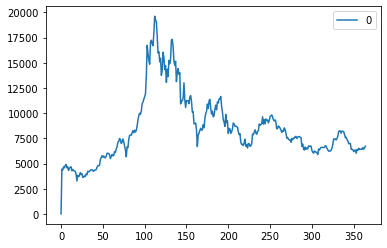

In [14]:
fig = model_fit.predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
fig_dt = pd.DataFrame(fig)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()
fig_dt.plot()

In [15]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.
forecast_data[2]

# 테스트 데이터셋을 불러옵니다.
test_file_path = './num_2/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data.tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)

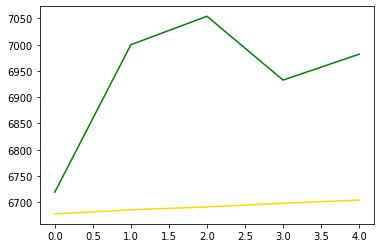

In [16]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

270.1596372038842


In [19]:
from fbprophet import Prophet

In [20]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [21]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [ ]:
forecast_data

In [ ]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

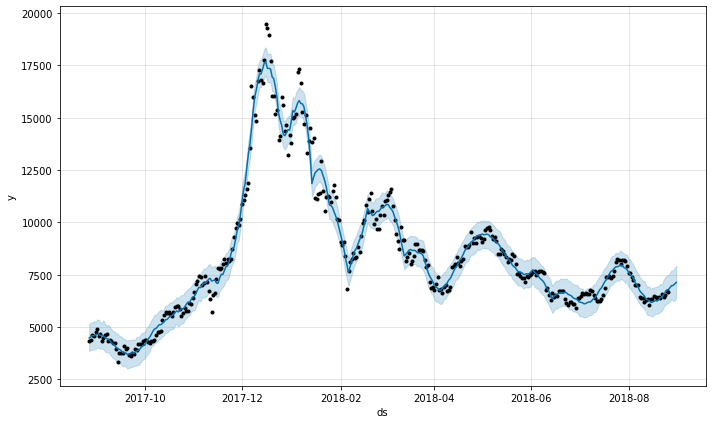

In [24]:
fig1 = prophet.plot(forecast_data)

In [ ]:
fig2 = prophet.plot_components(forecast_data)

In [26]:
y = bitcoin_df.y.values[5:] # 첫 5일을 제외한 실제 가격 데이터입니다.
y_pred = forecast_data.yhat.values[5:-5] # 첫 5일, 마지막 5일을 제외한 예측 가격 데이터입니다.

In [27]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

519.4229203587638
0.9740657504711117


In [28]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값입니다.

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [31]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

118.14587298999649


- 주가데이터의 경우 의미가 없지만, 일반적인 시계열 데이터의 경우 상한값 혹은 하한값을 잘 설정해주는 것이 도움이 되기도 합니다.

In [29]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

# 상한가를 설정합니다.
bitcoin_df['cap'] = 20000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정합니다.
prophet = Prophet(seasonality_mode='multiplicative', 
                  growth='logistic',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [30]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# 상한가를 설정합니다.
future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

In [31]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

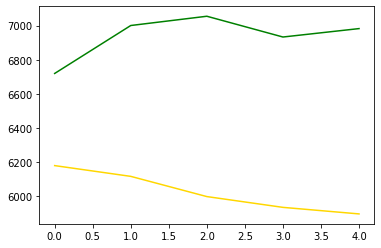

In [32]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [33]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

933.6503856863974


- 가격이 18000을 넘어가는 값을 이상치로 판단하여 제거합니다.

In [34]:
# 18000 이상의 데이터는 이상치라고 판단
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

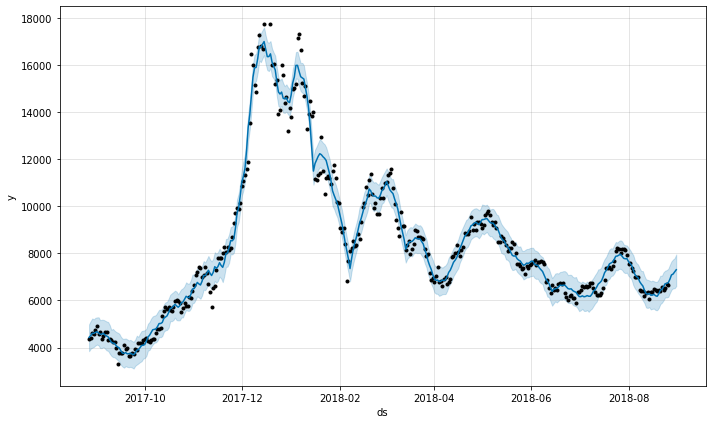

In [35]:
# prophet 모델을 학습합니다.
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일단위의 미래를 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

# 예측 결과를 그래프로 출력합니다.
fig = prophet.plot(forecast_data)

In [36]:
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

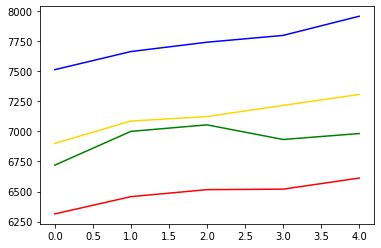

In [37]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

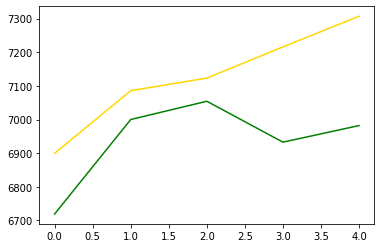

In [38]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [39]:
# 테스트 데이터의 RMSE를 출력합니다.
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

214.7340224079163


###### 적절한 파라미터 선정하기
- ARIMA 모델은 p,d,q 세 가지 파라미터를 적절하게 선정하는 것이 가장 중요합니다.
- ACF(Autocorrelation function), PACF(Partial autocorrelation function) 그래프를 통해 대략적인 파라미터를 선정합니다.

In [40]:
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

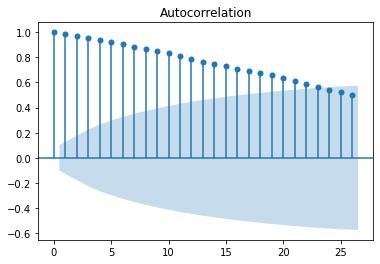

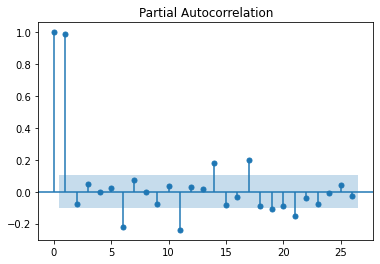

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(bitcoin_df.price.values)
plot_pacf(bitcoin_df.price.values)
plt.show()

In [43]:
model = ARIMA(bitcoin_df.price.values, order=(15,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                ARIMA(15, 2, 0)   Log Likelihood               -2767.330
Date:                Fri, 06 May 2022   AIC                           5566.659
Time:                        02:50:30   BIC                           5628.970
Sample:                             0   HQIC                          5591.427
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8109      0.038    -21.067      0.000      -0.886      -0.735
ar.L2         -0.7800      0.049    -15.761      0.000      -0.877      -0.683
ar.L3         -0.7108      0.055    -12.958      0.0

In [44]:
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.490
Date:                Fri, 06 May 2022   AIC                           5584.980
Time:                        02:51:10   BIC                           5604.466
Sample:                             0   HQIC                          5592.725
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2418      0.305      0.794      0.427      -0.355       0.839
ar.L2          0.6072      0.200      3.038      0.002       0.215       0.999
ma.L1         -0.1513      0.306     -0.495      0.6

- statsmodels 0.10.2 version code

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Fri, 06 May 2022   AIC                           5587.107
Time:                        21:23:19   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3643     27.794      0.229      0.819     -48.111      60.840
ar.L1.D.y     -0.3789      1.827     -0.207      0.836      -3.960       3.203
ar.L2.D.y      0.1585      1.191      0.133      0.8

<AxesSubplot:>

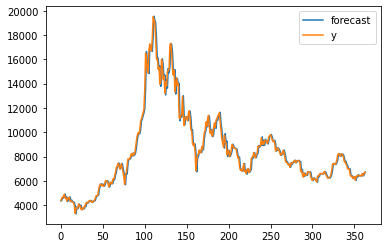

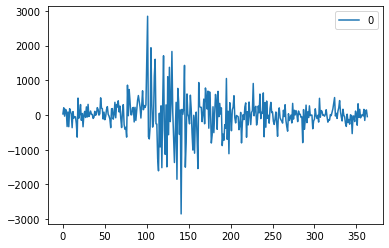

In [45]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [47]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
test_file_path = './num_2/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

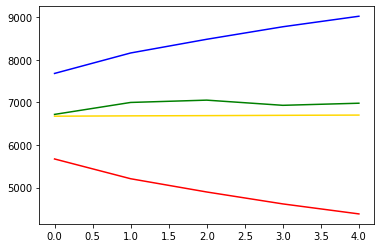

In [48]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

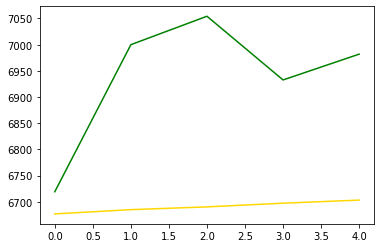

In [49]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

270.71589424463974
